In [1]:
import pandas as pd

In [2]:
urls=[
    "https://fbref.com/en/comps/Big5/2006-2007/stats/players/2006-2007-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2007-2008/stats/players/2007-2008-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2008-2009/stats/players/2008-2009-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2009-2010/stats/players/2009-2010-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2010-2011/stats/players/2010-2011-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2011-2012/stats/players/2011-2012-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2012-2013/stats/players/2012-2013-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2013-2014/stats/players/2013-2014-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2014-2015/stats/players/2014-2015-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2015-2016/stats/players/2015-2016-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2016-2017/stats/players/2016-2017-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2017-2018/stats/players/2017-2018-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2018-2019/stats/players/2018-2019-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats"
]

In [3]:
def get_data(url,name):
  import requests
  from bs4 import BeautifulSoup
  import csv
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  table = soup.find("table", {"id": "stats_standard"})
  rows = table.findAll("tr")
  player_data = []
  for row in rows:
      cells = row.findAll("td")
      if len(cells) > 0:
          player_name = cells[0].text.strip()
          player_stats = [cell.text.strip() for cell in cells[1:]]
          player_data.append([player_name] + player_stats)
  with open(str(name)+".csv", "w", newline="") as f:
      writer = csv.writer(f)
      if int(name)>2016:
        writer.writerow(["Player","Nation","Pos","Squad","Comp","Age","Born","MP","Starts","Min","90s","Gls","Ast","G+A","G-PK","PK","PKatt","CrdY","CrdR","xG","npxG","xAG","npxG+xAG","PrgC","PrgP","PrgR","Gls90","Ast90","G+A90","G-PK90","G+A-PK90","xG90","xAG90","xG+xAG90","npxG90","npxG+xAG90","Matches"])
      else:									
        writer.writerow(["Player","Nation","Pos", "Squad","Comp","Age","Born","MP", "Starts", "Min","90s","Gls", "Ast","G+A","G-PK","PK", "PKatt", "CrdY", "CrdR", "Gls90", "Ast90", "G+A90", "G-PK90", "G+A-PK90","Matches"])
      writer.writerows(player_data)

In [4]:
for index,url in enumerate(urls):
  get_data(url,int(2006+index))

In [5]:
df_2006_07=pd.read_csv('2006.csv')
df_2007_08=pd.read_csv('2007.csv')
df_2008_09=pd.read_csv('2008.csv')
df_2009_10=pd.read_csv('2009.csv')
df_2010_11=pd.read_csv('2010.csv')
df_2011_12=pd.read_csv('2011.csv')
df_2012_13=pd.read_csv('2012.csv')
df_2013_14=pd.read_csv('2013.csv')
df_2014_15=pd.read_csv('2014.csv')
df_2015_16=pd.read_csv('2015.csv')
df_2016_17=pd.read_csv('2016.csv')
df_2017_18=pd.read_csv('2017.csv')
df_2018_19=pd.read_csv('2018.csv')
df_2019_20=pd.read_csv('2019.csv')

In [6]:
frames=[df_2006_07,df_2007_08,df_2008_09,df_2009_10,df_2010_11,df_2011_12,df_2012_13,df_2013_14,df_2014_15,df_2015_16,df_2016_17,df_2017_18,df_2018_19,df_2019_20]

In [7]:
df_concated=pd.concat(frames)

In [8]:
df_concated['Season']=df_concated['Age']+df_concated['Born']

In [9]:
df_concated=df_concated.drop(["xG","npxG","xAG","npxG+xAG","PrgC","PrgP","PrgR","xG90","xAG90","xG+xAG90","npxG90","npxG+xAG90"], axis=1)

In [10]:
df_concated=df_concated.drop(['Pos','Squad','Comp','Matches'],axis=1)

In [11]:
len(df_concated.columns)
df_concated.Min = df_concated.Min.apply(lambda x : x.replace(',',''))
df_concated.Min = df_concated['Min'].astype('int')

In [12]:
df_concated.sort_values(by='Gls', ascending=False)

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season
1700,Lionel Messi,ar ARG,24.0,1987.0,37,36,3270,36.3,50,16.0,...,10.0,11.0,6,0,1.38,0.44,1.82,1.10,1.54,2011.0
2166,Cristiano Ronaldo,pt POR,29.0,1985.0,35,35,3100,34.4,48,16.0,...,10.0,12.0,5,1,1.39,0.46,1.86,1.10,1.57,2014.0
1682,Lionel Messi,ar ARG,25.0,1987.0,32,28,2650,29.4,46,11.0,...,4.0,4.0,1,0,1.56,0.37,1.94,1.43,1.80,2012.0
2219,Cristiano Ronaldo,pt POR,26.0,1985.0,38,37,3350,37.2,46,12.0,...,12.0,13.0,4,0,1.24,0.32,1.56,0.91,1.24,2011.0
1678,Lionel Messi,ar ARG,27.0,1987.0,38,37,3375,37.5,43,18.0,...,5.0,6.0,4,0,1.15,0.48,1.63,1.01,1.49,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Davide Brivio,it ITA,24.0,1988.0,20,15,1445,16.1,0,0.0,...,0.0,0.0,3,1,0.00,0.00,0.00,0.00,0.00,2012.0
402,Leon Britton,eng ENG,29.0,1982.0,33,30,2525,28.1,0,0.0,...,0.0,0.0,4,0,0.00,0.00,0.00,0.00,0.00,2011.0
401,Miguel Britos,uy URU,27.0,1985.0,22,22,1797,20.0,0,0.0,...,0.0,0.0,5,0,0.00,0.00,0.00,0.00,0.00,2012.0
400,Jonathan Brison,fr FRA,29.0,1983.0,24,23,1938,21.5,0,4.0,...,0.0,0.0,4,1,0.00,0.19,0.19,0.00,0.19,2012.0


<Axes: xlabel='Player', ylabel='Gls'>

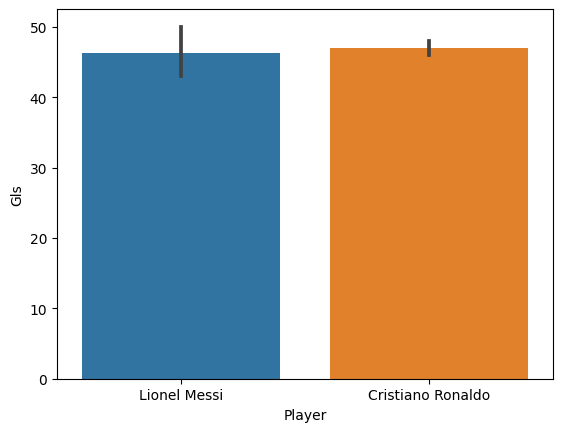

In [13]:
import seaborn as sns
data=df_concated.sort_values('Gls', ascending=False).head(5)
sns.barplot(
    x='Player',
    y='Gls',
    data=data
)

In [14]:
df_concated.sort_values(by='Ast', ascending=False)

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season
1648,Lionel Messi,ar ARG,32.0,1987.0,33,32,2880,32.0,25,21.0,...,5.0,5.0,4,0,0.78,0.66,1.44,0.62,1.28,2019.0
1726,Thomas Müller,de GER,29.0,1989.0,33,26,2255,25.1,8,21.0,...,0.0,0.0,5,0,0.32,0.84,1.16,0.32,1.16,2018.0
651,Kevin De Bruyne,be BEL,23.0,1991.0,34,34,3047,33.9,10,20.0,...,0.0,0.0,3,0,0.30,0.59,0.89,0.30,0.89,2014.0
634,Kevin De Bruyne,be BEL,28.0,1991.0,35,32,2791,31.0,13,20.0,...,2.0,2.0,3,0,0.42,0.64,1.06,0.35,1.00,2019.0
1701,Lionel Messi,ar ARG,23.0,1987.0,33,31,2858,31.8,31,19.0,...,4.0,4.0,3,0,0.98,0.60,1.57,0.85,1.45,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,Christian Weber,de GER,28.0,1983.0,1,1,90,1.0,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2011.0
420,Elia Bruzzi,NaN,18.0,1995.0,1,0,12,0.1,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2013.0
1733,Pierre-François Moracchini,NaN,19.0,1994.0,1,0,1,0.0,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2013.0
1901,Cédric Orengo,fr FRA,17.0,1995.0,2,0,25,0.3,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2012.0


<Axes: xlabel='Player', ylabel='Ast'>

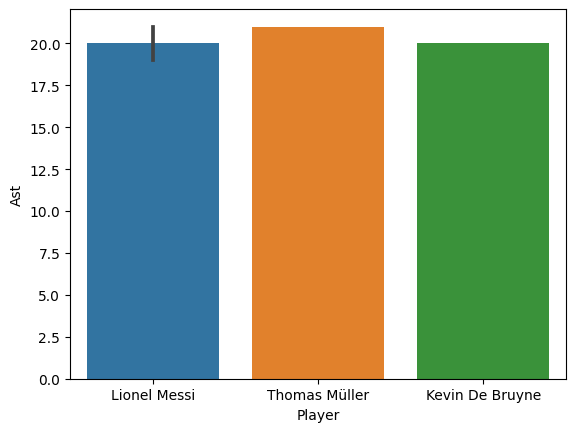

In [15]:
data=df_concated.sort_values('Ast', ascending=False).head(5)
sns.barplot(
    x='Player',
    y='Ast',
    data=data
)

In [16]:
df_concated.sort_values(by='G+A', ascending=False)

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season
1700,Lionel Messi,ar ARG,24.0,1987.0,37,36,3270,36.3,50,16.0,...,10.0,11.0,6,0,1.38,0.44,1.82,1.10,1.54,2011.0
2166,Cristiano Ronaldo,pt POR,29.0,1985.0,35,35,3100,34.4,48,16.0,...,10.0,12.0,5,1,1.39,0.46,1.86,1.10,1.57,2014.0
1678,Lionel Messi,ar ARG,27.0,1987.0,38,37,3375,37.5,43,18.0,...,5.0,6.0,4,0,1.15,0.48,1.63,1.01,1.49,2014.0
2219,Cristiano Ronaldo,pt POR,26.0,1985.0,38,37,3350,37.2,46,12.0,...,12.0,13.0,4,0,1.24,0.32,1.56,0.91,1.24,2011.0
1682,Lionel Messi,ar ARG,25.0,1987.0,32,28,2650,29.4,46,11.0,...,4.0,4.0,1,0,1.56,0.37,1.94,1.43,1.80,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,Christian Weber,de GER,28.0,1983.0,1,1,90,1.0,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2011.0
420,Elia Bruzzi,NaN,18.0,1995.0,1,0,12,0.1,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2013.0
1733,Pierre-François Moracchini,NaN,19.0,1994.0,1,0,1,0.0,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2013.0
1901,Cédric Orengo,fr FRA,17.0,1995.0,2,0,25,0.3,0,NaN,...,0.0,NaN,0,0,0.00,NaN,NaN,0.00,NaN,2012.0


<Axes: xlabel='Player', ylabel='G+A'>

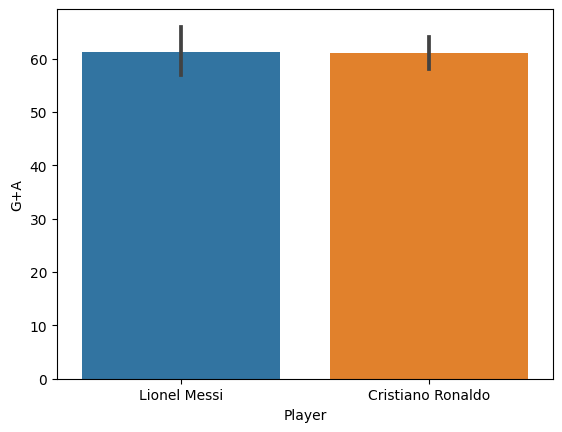

In [17]:
data=df_concated.sort_values('G+A', ascending=False).head(5)
sns.barplot(
    x='Player',
    y='G+A',
    data=data
)

In [18]:
df_concated_grtr=df_concated[df_concated['G+A']>20]
df_concated_grtr.sort_values(by='G+A90', ascending=False)

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season
1682,Lionel Messi,ar ARG,25.0,1987.0,32,28,2650,29.4,46,11.0,...,4.0,4.0,1,0,1.56,0.37,1.94,1.43,1.80,2012.0
2166,Cristiano Ronaldo,pt POR,29.0,1985.0,35,35,3100,34.4,48,16.0,...,10.0,12.0,5,1,1.39,0.46,1.86,1.10,1.57,2014.0
1700,Lionel Messi,ar ARG,24.0,1987.0,37,36,3270,36.3,50,16.0,...,10.0,11.0,6,0,1.38,0.44,1.82,1.10,1.54,2011.0
1191,Zlatan Ibrahimović,se SWE,33.0,1981.0,31,29,2549,28.3,38,13.0,...,5.0,6.0,1,0,1.34,0.46,1.80,1.17,1.62,2014.0
1619,Lionel Messi,ar ARG,31.0,1987.0,34,29,2713,30.1,36,13.0,...,4.0,5.0,3,0,1.19,0.43,1.63,1.06,1.49,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2536,Jamie Vardy,eng ENG,30.0,1987.0,37,37,3247,36.1,20,1.0,...,5.0,6.0,3,0,0.55,0.03,0.58,0.42,0.44,2017.0
1367,Frank Lampard,eng ENG,28.0,1978.0,37,36,3244,36.0,11,10.0,...,3.0,4.0,3,0,0.31,0.28,0.58,0.22,0.50,2006.0
979,Sergio García,es ESP,30.0,1983.0,37,37,3244,36.0,12,9.0,...,5.0,6.0,8,0,0.33,0.25,0.58,0.19,0.44,2013.0
1628,Marvin Martin,fr FRA,22.0,1988.0,37,37,3307,36.7,3,18.0,...,0.0,0.0,6,0,0.08,0.49,0.57,0.08,0.57,2010.0


<Axes: xlabel='Player', ylabel='G+A90'>

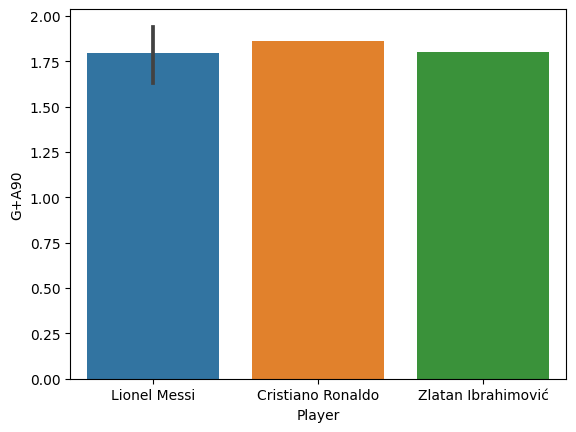

In [19]:
data=df_concated_grtr.sort_values('G+A90', ascending=False).head(5)
sns.barplot(
    x='Player',
    y='G+A90',
    data=data
)

In [20]:
df_concated.columns

Index(['Player', 'Nation', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls90', 'Ast90',
       'G+A90', 'G-PK90', 'G+A-PK90', 'Season'],
      dtype='object')

In [21]:
df_grouped=df_concated.groupby(['Player','Nation','Born']).agg({ 'MP': 'sum', 'Starts': 'sum', 'Min': 'sum', 'Gls': 'sum', 'Ast': 'sum', 'G+A': 'sum', 'G-PK': 'sum', 'PK': 'sum', 'PKatt': 'sum', 'CrdY': 'sum', 'CrdR': 'sum','Player':'first', 'Gls90': 'mean', 'Ast90': 'mean', 'G+A90': 'mean', 'G-PK90': 'mean', 'G+A-PK90': 'mean'})

In [22]:
df_grouped

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Aaron Connolly,ie IRL,2000.0,24,14,1258,3,1.0,4.0,3.0,0.0,0.0,0,0,Aaron Connolly,0.210000,0.070000,0.290000,0.210000,0.290000
Aaron Cresswell,eng ENG,1989.0,188,183,16235,8,14.0,22.0,8.0,0.0,0.0,24,2,Aaron Cresswell,0.038333,0.076667,0.115000,0.038333,0.115000
Aaron Doran,ie IRL,1991.0,3,0,119,0,0.0,0.0,0.0,0.0,0.0,1,0,Aaron Doran,0.000000,0.000000,0.000000,0.000000,0.000000
Aaron Hughes,nir NIR,1979.0,215,206,18540,1,0.0,1.0,1.0,0.0,0.0,5,0,Aaron Hughes,0.003750,0.000000,0.003750,0.003750,0.003750
Aaron Hunt,de GER,1986.0,286,222,19981,55,37.0,92.0,44.0,11.0,14.0,32,1,Aaron Hunt,0.226923,0.151538,0.377692,0.192308,0.341538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Žan Celar,si SVN,1999.0,1,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0,Žan Celar,0.000000,0.000000,0.000000,0.000000,0.000000
Žan Majer,si SVN,1992.0,27,19,1664,1,1.0,2.0,1.0,0.0,0.0,7,0,Žan Majer,0.050000,0.050000,0.110000,0.050000,0.110000
Željko Brkić,rs SRB,1986.0,86,85,7584,0,0.0,0.0,0.0,0.0,0.0,2,1,Željko Brkić,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
df_grouped.sort_values(by='Ast', ascending=False)

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,1987.0,460,420,38083,437,179.0,616.0,379.0,58.0,70.0,44,0,Lionel Messi,1.008571,0.418571,1.425714,0.873571,1.290000
Cesc Fàbregas,es ESP,1987.0,409,346,30192,74,137.0,211.0,67.0,7.0,9.0,83,4,Cesc Fàbregas,0.205333,0.376000,0.580000,0.187333,0.563333
Mesut Özil,de GER,1988.0,390,328,29121,65,130.0,195.0,64.0,1.0,2.0,29,2,Mesut Özil,0.166250,0.326875,0.495000,0.164375,0.492500
Cristiano Ronaldo,pt POR,1985.0,457,440,38971,429,116.0,545.0,340.0,89.0,104.0,54,6,Cristiano Ronaldo,0.983571,0.265000,1.247857,0.781429,1.047143
Thomas Müller,de GER,1989.0,351,299,26002,118,116.0,234.0,105.0,13.0,15.0,23,0,Thomas Müller,0.377500,0.379167,0.756667,0.335000,0.713333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Henrik Ernst,de GER,1986.0,2,0,20,0,0.0,0.0,0.0,0.0,0.0,0,0,Henrik Ernst,0.000000,0.000000,0.000000,0.000000,0.000000
Mehmet Scholl,de GER,1970.0,14,1,305,1,0.0,1.0,1.0,0.0,0.0,0,0,Mehmet Scholl,0.300000,0.000000,0.300000,0.300000,0.300000
Andrés Lamas,uy URU,1984.0,13,11,1016,0,0.0,0.0,0.0,0.0,0.0,4,1,Andrés Lamas,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Player', ylabel='Ast'>

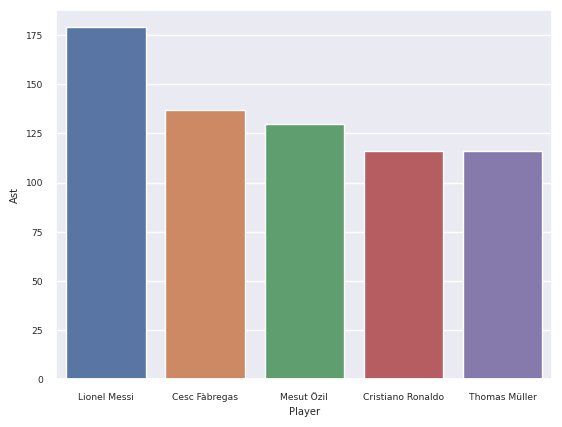

In [24]:
data=df_grouped.sort_values('Ast', ascending=False).head(5)
sns.set(font_scale=0.6)
sns.barplot(
    x='Player',
    y='Ast',
    data=data
)

In [25]:
df_grouped.sort_values(by='Gls', ascending=False)

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,1987.0,460,420,38083,437,179.0,616.0,379.0,58.0,70.0,44,0,Lionel Messi,1.008571,0.418571,1.425714,0.873571,1.290000
Cristiano Ronaldo,pt POR,1985.0,457,440,38971,429,116.0,545.0,340.0,89.0,104.0,54,6,Cristiano Ronaldo,0.983571,0.265000,1.247857,0.781429,1.047143
Zlatan Ibrahimović,se SWE,1981.0,351,327,28828,255,92.0,347.0,202.0,53.0,62.0,63,7,Zlatan Ibrahimović,0.729231,0.270000,0.998462,0.572308,0.842308
Sergio Agüero,ar ARG,1988.0,438,377,32352,255,71.0,326.0,228.0,27.0,32.0,52,3,Sergio Agüero,0.728571,0.198571,0.929286,0.650714,0.850714
Edinson Cavani,uy URU,1987.0,413,354,31730,250,40.0,290.0,212.0,38.0,51.0,50,2,Edinson Cavani,0.679286,0.110000,0.787857,0.575714,0.687143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Christian Vander,de GER,1980.0,10,9,840,0,0.0,0.0,0.0,0.0,0.0,0,0,Christian Vander,0.000000,0.000000,0.000000,0.000000,0.000000
Christian Weber,de GER,1983.0,12,9,955,0,1.0,1.0,0.0,0.0,0.0,1,0,Christian Weber,0.000000,0.100000,0.100000,0.000000,0.100000
Christian Wetklo,de GER,1980.0,92,90,8093,0,0.0,0.0,0.0,0.0,0.0,12,2,Christian Wetklo,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Player', ylabel='Gls'>

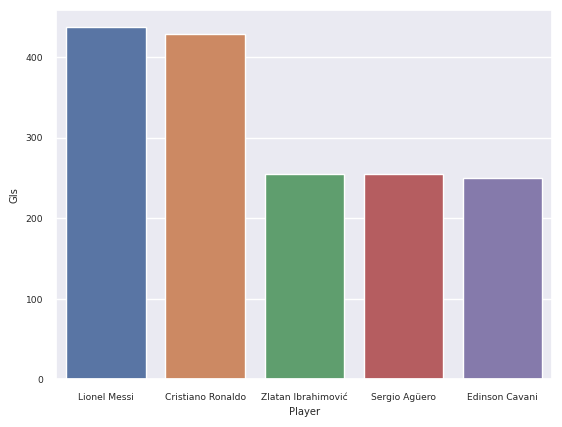

In [26]:
data=df_grouped.sort_values('Gls', ascending=False).head(5)
sns.set(font_scale=0.6)
sns.barplot(
    x='Player',
    y='Gls',
    data=data
)

In [27]:
df_grouped.sort_values(by='G+A', ascending=False)

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Lionel Messi,ar ARG,1987.0,460,420,38083,437,179.0,616.0,379.0,58.0,70.0,44,0,Lionel Messi,1.008571,0.418571,1.425714,0.873571,1.290000
Cristiano Ronaldo,pt POR,1985.0,457,440,38971,429,116.0,545.0,340.0,89.0,104.0,54,6,Cristiano Ronaldo,0.983571,0.265000,1.247857,0.781429,1.047143
Zlatan Ibrahimović,se SWE,1981.0,351,327,28828,255,92.0,347.0,202.0,53.0,62.0,63,7,Zlatan Ibrahimović,0.729231,0.270000,0.998462,0.572308,0.842308
Sergio Agüero,ar ARG,1988.0,438,377,32352,255,71.0,326.0,228.0,27.0,32.0,52,3,Sergio Agüero,0.728571,0.198571,0.929286,0.650714,0.850714
Luis Suárez,uy URU,1987.0,301,286,25449,215,91.0,306.0,206.0,9.0,12.0,60,0,Luis Suárez,0.722000,0.320000,1.042000,0.694000,1.013000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luis García,es ESP,1979.0,3,2,205,0,0.0,0.0,0.0,0.0,0.0,0,0,Luis García,0.000000,0.000000,0.000000,0.000000,0.000000
Luis Fernández,es ESP,1972.0,37,35,3051,0,0.0,0.0,0.0,0.0,0.0,8,0,Luis Fernández,0.000000,0.000000,0.000000,0.000000,0.000000
Luis Carlos Martín,es ESP,1990.0,1,0,36,0,0.0,0.0,0.0,0.0,0.0,0,0,Luis Carlos Martín,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Player', ylabel='G+A'>

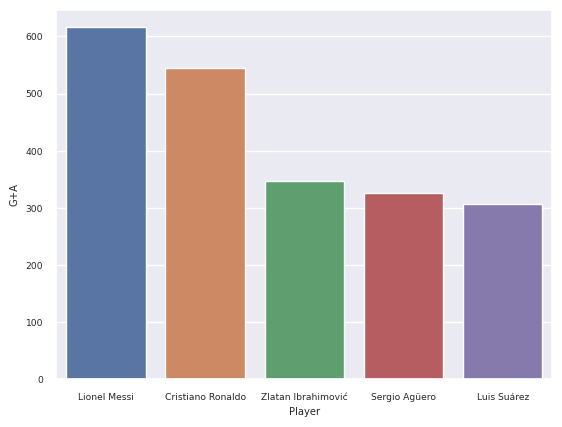

In [28]:
data=df_grouped.sort_values('G+A', ascending=False).head(5)
sns.set(font_scale=0.6)
sns.barplot(
    x='Player',
    y='G+A',
    data=data
)

In [29]:
df_grouped_grtr=df_grouped[df_grouped['G+A']>30]
df_grouped_grtr.sort_values(by='G+A90', ascending=False)

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Ruud van Nistelrooy,nl NED,1976.0,132,100,9081,62,14.0,76.0,56.0,6.0,7.0,14,1,Ruud van Nistelrooy,1.510000,1.091429,2.602857,1.472857,2.568571
Alexander Meier,de GER,1983.0,237,212,18949,86,21.0,107.0,78.0,8.0,11.0,24,1,Alexander Meier,2.400909,0.082727,2.483636,2.370909,2.451818
Lionel Messi,ar ARG,1987.0,460,420,38083,437,179.0,616.0,379.0,58.0,70.0,44,0,Lionel Messi,1.008571,0.418571,1.425714,0.873571,1.290000
Cristiano Ronaldo,pt POR,1985.0,457,440,38971,429,116.0,545.0,340.0,89.0,104.0,54,6,Cristiano Ronaldo,0.983571,0.265000,1.247857,0.781429,1.047143
Neymar,br BRA,1992.0,175,163,14544,115,61.0,176.0,94.0,21.0,24.0,36,3,Neymar,0.740000,0.401429,1.138571,0.590000,0.985714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diego Godín,uy URU,1986.0,391,378,33705,22,13.0,35.0,22.0,0.0,0.0,104,7,Diego Godín,0.057692,0.034615,0.091538,0.057692,0.091538
Leonardo Bonucci,it ITA,1987.0,364,350,31663,24,7.0,31.0,24.0,0.0,0.0,70,3,Leonardo Bonucci,0.070909,0.020000,0.090000,0.070909,0.090000
Bruno Soriano,es ESP,1984.0,288,252,23002,21,10.0,31.0,10.0,11.0,12.0,59,2,Bruno Soriano,0.060909,0.028182,0.090000,0.028182,0.057273


<Axes: xlabel='Player', ylabel='G+A90'>

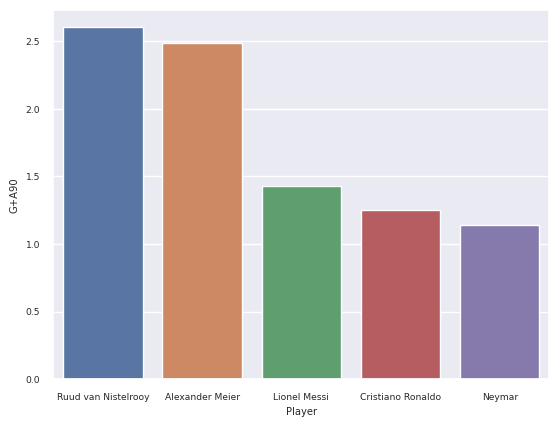

In [30]:
data=df_grouped_grtr.sort_values('G+A90', ascending=False).head(5)
sns.set(font_scale=0.6)
sns.barplot(
    x='Player',
    y='G+A90',
    data=data
)

In [31]:
df_grouped_grtr.sort_values(by='Gls90', ascending=False)

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Alexander Meier,de GER,1983.0,237,212,18949,86,21.0,107.0,78.0,8.0,11.0,24,1,Alexander Meier,2.400909,0.082727,2.483636,2.370909,2.451818
Joselu,es ESP,1990.0,204,137,12833,49,11.0,59.0,47.0,2.0,5.0,25,0,Joselu,1.735556,0.070000,0.415000,1.726667,0.406250
Ruud van Nistelrooy,nl NED,1976.0,132,100,9081,62,14.0,76.0,56.0,6.0,7.0,14,1,Ruud van Nistelrooy,1.510000,1.091429,2.602857,1.472857,2.568571
Lionel Messi,ar ARG,1987.0,460,420,38083,437,179.0,616.0,379.0,58.0,70.0,44,0,Lionel Messi,1.008571,0.418571,1.425714,0.873571,1.290000
Cristiano Ronaldo,pt POR,1985.0,457,440,38971,429,116.0,545.0,340.0,89.0,104.0,54,6,Cristiano Ronaldo,0.983571,0.265000,1.247857,0.781429,1.047143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kyle Walker,eng ENG,1990.0,292,285,25106,7,28.0,35.0,7.0,0.0,0.0,46,2,Kyle Walker,0.022500,0.081667,0.103333,0.022500,0.103333
Dani Carvajal,es ESP,1992.0,218,200,18000,5,29.0,34.0,5.0,0.0,0.0,73,1,Dani Carvajal,0.022500,0.145000,0.168750,0.022500,0.168750
César Azpilicueta,es ESP,1989.0,417,402,36063,9,34.0,43.0,9.0,0.0,0.0,52,2,César Azpilicueta,0.018000,0.077143,0.095000,0.018000,0.095000


<Axes: xlabel='Player', ylabel='Gls90'>

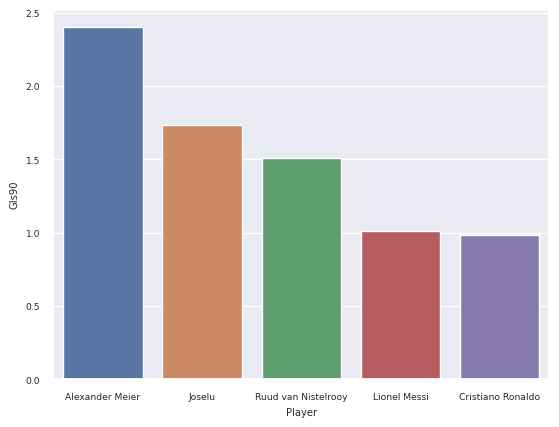

In [32]:
data=df_grouped_grtr.sort_values('Gls90', ascending=False).head(5)
sns.set(font_scale=0.6)
sns.barplot(
    x='Player',
    y='Gls90',
    data=data
)

In [33]:
df_grouped.isnull().values.any()

True

But if Almost all the Stastics are dominated by the 2 slightly renouned players, Ronaldo and Messi.. Why not take some comparisions based on detailed stastics for them!?
Cauz That's what we have done!

In [34]:
df_grouped.dropna()

,,,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,Player,Gls90,Ast90,G+A90,G-PK90,G+A-PK90
Player,Nation,Born,,,,,,,,,,,,,,,,,
Aaron Connolly,ie IRL,2000.0,24,14,1258,3,1.0,4.0,3.0,0.0,0.0,0,0,Aaron Connolly,0.210000,0.070000,0.290000,0.210000,0.290000
Aaron Cresswell,eng ENG,1989.0,188,183,16235,8,14.0,22.0,8.0,0.0,0.0,24,2,Aaron Cresswell,0.038333,0.076667,0.115000,0.038333,0.115000
Aaron Doran,ie IRL,1991.0,3,0,119,0,0.0,0.0,0.0,0.0,0.0,1,0,Aaron Doran,0.000000,0.000000,0.000000,0.000000,0.000000
Aaron Hughes,nir NIR,1979.0,215,206,18540,1,0.0,1.0,1.0,0.0,0.0,5,0,Aaron Hughes,0.003750,0.000000,0.003750,0.003750,0.003750
Aaron Hunt,de GER,1986.0,286,222,19981,55,37.0,92.0,44.0,11.0,14.0,32,1,Aaron Hunt,0.226923,0.151538,0.377692,0.192308,0.341538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Žan Celar,si SVN,1999.0,1,0,5,0,0.0,0.0,0.0,0.0,0.0,0,0,Žan Celar,0.000000,0.000000,0.000000,0.000000,0.000000
Žan Majer,si SVN,1992.0,27,19,1664,1,1.0,2.0,1.0,0.0,0.0,7,0,Žan Majer,0.050000,0.050000,0.110000,0.050000,0.110000
Željko Brkić,rs SRB,1986.0,86,85,7584,0,0.0,0.0,0.0,0.0,0.0,2,1,Željko Brkić,0.000000,0.000000,0.000000,0.000000,0.000000


We will be drawing some correlations amongst the grouped and seeing how they turn out!

0.757493184472052 0.0


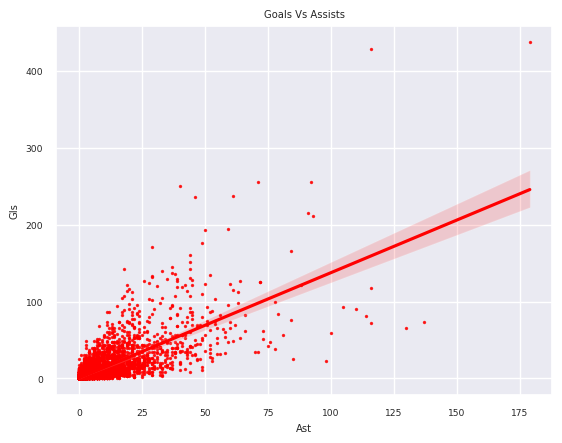

In [35]:
from scipy import stats
sns.regplot(x='Ast', y='Gls', data=df_grouped,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Goals Vs Assists')
r,p=stats.pearsonr(df_grouped['Ast'],df_grouped['Gls'])
print(r,p)

0.6115204549349347 0.0


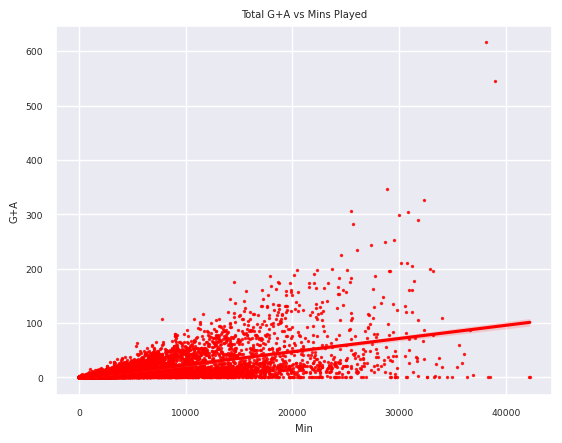

In [36]:
sns.regplot(x='Min', y='G+A', data=df_grouped,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Total G+A vs Mins Played')
r,p=stats.pearsonr(df_grouped['Min'],df_grouped['G+A'])
print(r,p)

0.537728280621614 0.0


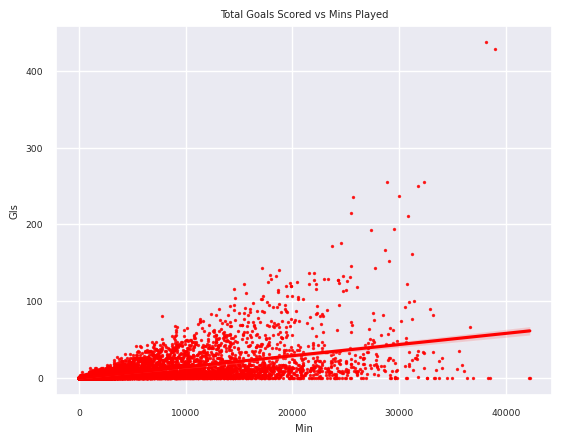

In [37]:
sns.regplot(x='Min', y='Gls', data=df_grouped,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Total Goals Scored vs Mins Played')
r,p=stats.pearsonr(df_grouped['Min'],df_grouped['Gls'])
print(r,p)

In [38]:
df_concated.columns

Index(['Player', 'Nation', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls90', 'Ast90',
       'G+A90', 'G-PK90', 'G+A-PK90', 'Season'],
      dtype='object')

In [39]:
df_grp_age=df_concated.groupby(['Age']).agg({ 'Age':'first','MP': 'mean', 'Starts': 'mean', 'Min': 'mean', 'Gls': 'mean', 'Ast': 'mean', 'G+A': 'mean', 'G-PK': 'mean', 'PK': 'mean', 'PKatt': 'mean', 'CrdY': 'mean', 'CrdR': 'mean', 'Gls90': 'mean', 'Ast90': 'mean', 'G+A90': 'mean', 'G-PK90': 'mean', 'G+A-PK90': 'mean'})

0.002552534216359925 0.98893782294673


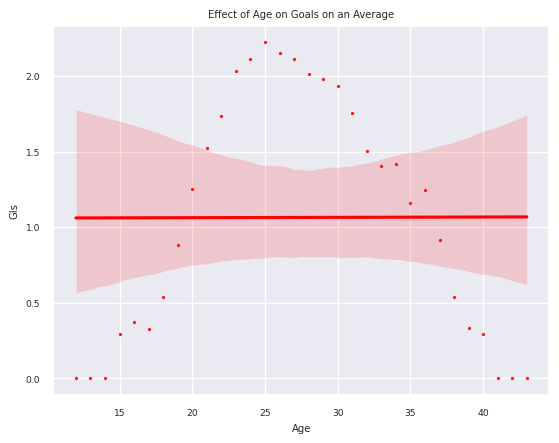

In [40]:
df_grp_age=df_concated.groupby(['Age']).agg({ 'Age':'first','MP': 'mean', 'Starts': 'mean', 'Min': 'mean', 'Gls': 'mean', 'Ast': 'mean', 'G+A': 'mean', 'G-PK': 'mean', 'PK': 'mean', 'PKatt': 'mean', 'CrdY': 'mean', 'CrdR': 'mean', 'Gls90': 'mean', 'Ast90': 'mean', 'G+A90': 'mean', 'G-PK90': 'mean', 'G+A-PK90': 'mean'})
sns.regplot(x='Age', y='Gls', data=df_grp_age,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Effect of Age on Goals on an Average')
r,p=stats.pearsonr(df_grp_age['Age'],df_grp_age['Gls'])
print(r,p)

0.002552534216359925 0.98893782294673


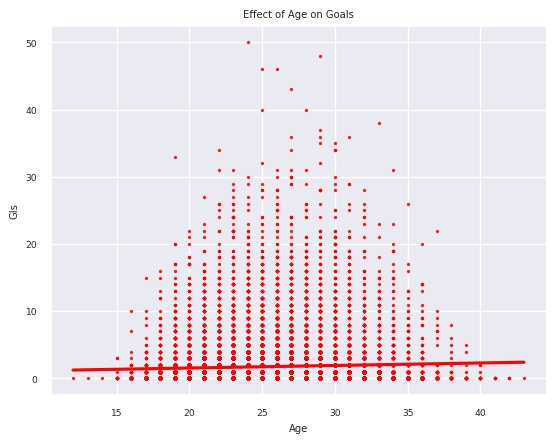

In [41]:
sns.regplot(x='Age', y='Gls', data=df_concated,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Effect of Age on Goals')
# r,p=stats.pearsonr(df_concated['Age'],df_concated['Gls'])
print(r,p)

0.002552534216359925 0.98893782294673


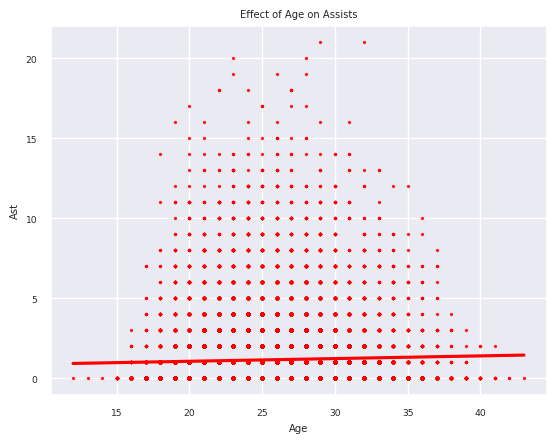

In [42]:
sns.regplot(x='Age', y='Ast', data=df_concated,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Effect of Age on Assists')
# r,p=stats.pearsonr(df_concated['Age'],df_concated['Gls'])
print(r,p)

0.03097325567919132 0.866362694624311


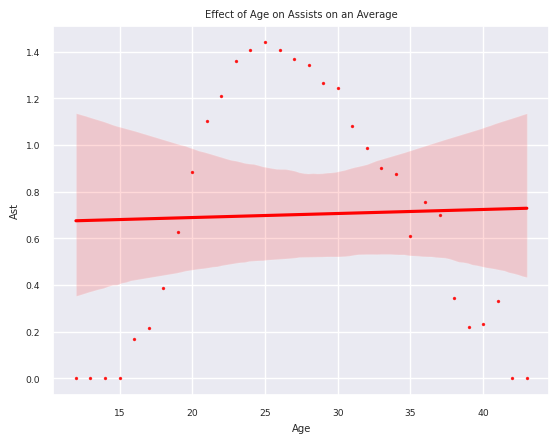

In [43]:
df_grp_age=df_concated.groupby(['Age']).agg({ 'Age':'first','MP': 'mean', 'Starts': 'mean', 'Min': 'mean', 'Gls': 'mean', 'Ast': 'mean', 'G+A': 'mean', 'G-PK': 'mean', 'PK': 'mean', 'PKatt': 'mean', 'CrdY': 'mean', 'CrdR': 'mean', 'Gls90': 'mean', 'Ast90': 'mean', 'G+A90': 'mean', 'G-PK90': 'mean', 'G+A-PK90': 'mean'})
sns.regplot(x='Age', y='Ast', data=df_grp_age,
            marker='o', color='red', scatter_kws={'s':2}).set(title='Effect of Age on Assists on an Average')
r,p=stats.pearsonr(df_grp_age['Age'],df_grp_age['Ast'])
print(r,p)

<Axes: xlabel='Age', ylabel='ctd'>

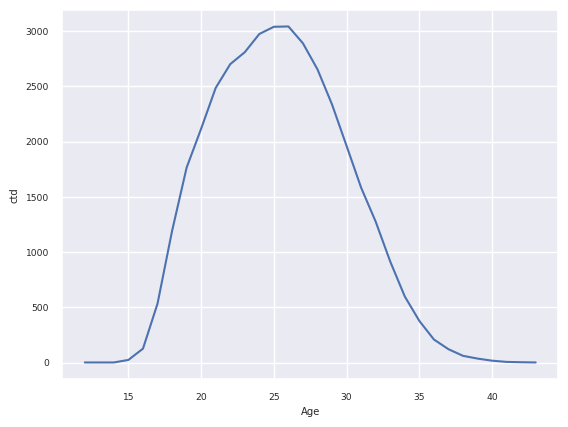

In [44]:
df_concated['ctd']=1
df_grp_age=df_concated.groupby(['Age']).agg({'ctd':'sum','Age':'first','MP': 'mean', 'Starts': 'mean', 'Min': 'mean', 'Gls': 'mean', 'Ast': 'mean', 'G+A': 'mean', 'G-PK': 'mean', 'PK': 'mean', 'PKatt': 'mean', 'CrdY': 'mean', 'CrdR': 'mean', 'Gls90': 'mean', 'Ast90': 'mean', 'G+A90': 'mean', 'G-PK90': 'mean', 'G+A-PK90': 'mean'})
sns.lineplot(data=df_grp_age, x="Age", y="ctd")
#Maximum players age of Age 25

In [45]:
df_concated[df_concated['Player']=='Lionel Messi']

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season,ctd
1601,Lionel Messi,ar ARG,19.0,1987.0,26,23,1983,22.0,14,3.0,...,0.0,2,0,0.64,0.14,0.77,0.64,0.77,2006.0,1
1647,Lionel Messi,ar ARG,20.0,1987.0,27,23,1973,21.9,10,12.0,...,4.0,2,0,0.46,0.55,1.00,0.27,0.82,2007.0,1
1688,Lionel Messi,ar ARG,21.0,1987.0,31,27,2516,28.0,23,11.0,...,4.0,2,0,0.82,0.39,1.22,0.72,1.11,2008.0,1
1711,Lionel Messi,ar ARG,22.0,1987.0,35,30,2805,31.2,34,9.0,...,1.0,3,0,1.09,0.29,1.38,1.06,1.35,2009.0,1
1701,Lionel Messi,ar ARG,23.0,1987.0,33,31,2858,31.8,31,19.0,...,4.0,3,0,0.98,0.60,1.57,0.85,1.45,2010.0,1
1700,Lionel Messi,ar ARG,24.0,1987.0,37,36,3270,36.3,50,16.0,...,11.0,6,0,1.38,0.44,1.82,1.10,1.54,2011.0,1
1682,Lionel Messi,ar ARG,25.0,1987.0,32,28,2650,29.4,46,11.0,...,4.0,1,0,1.56,0.37,1.94,1.43,1.80,2012.0,1
1688,Lionel Messi,ar ARG,26.0,1987.0,31,29,2501,27.8,28,11.0,...,8.0,2,0,1.01,0.40,1.40,0.76,1.15,2013.0,1
1678,Lionel Messi,ar ARG,27.0,1987.0,38,37,3375,37.5,43,18.0,...,6.0,4,0,1.15,0.48,1.63,1.01,1.49,2014.0,1
1739,Lionel Messi,ar ARG,28.0,1987.0,33,31,2729,30.3,26,14.0,...,7.0,3,0,0.86,0.46,1.32,0.76,1.22,2015.0,1


In [46]:
df_2006_07.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90',
       'Matches'],
      dtype='object')

In [47]:
for df in frames:
  df=df.drop(columns=['Player', 'Nation','Pos','Squad','Comp','Born','G-PK','G-PK90','G+A-PK90'])

In [48]:
df_2006_07.drop(columns=['Squad','Comp','Born','G-PK','G-PK90','G+A-PK90'])

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G+A,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,Matches
0,Dani Abalo,es ESP,"FW,MF",18,1,0,13,0.1,0,NaN,NaN,0.0,NaN,0,0,0.00,NaN,NaN,Matches
1,Jacques Abardonado,fr FRA,DF,28,30,28,"2,492",27.7,0,0.0,0.0,0.0,0.0,3,0,0.00,0.00,0.00,Matches
2,Christian Abbiati,it ITA,GK,29,36,36,"3,235",35.9,0,0.0,0.0,0.0,0.0,0,1,0.00,0.00,0.00,Matches
3,Pato Abbondanzieri,ar ARG,GK,33,36,36,"3,215",35.7,0,0.0,0.0,0.0,0.0,3,0,0.00,0.00,0.00,Matches
4,Elvis Abbruscato,it ITA,FW,25,29,15,"1,432",15.9,3,0.0,3.0,0.0,0.0,1,0,0.19,0.00,0.19,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,Carlo Zotti,it ITA,GK,23,1,1,90,1.0,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,Matches
2579,Ronald Zubar,fr FRA,DF,20,34,34,"2,985",33.2,0,1.0,1.0,0.0,0.0,4,0,0.00,0.03,0.03,Matches
2580,Iban Zubiaurre,es ESP,DF,23,1,0,33,0.4,0,0.0,0.0,0.0,0.0,0,0,0.00,0.00,0.00,Matches
2581,Sibusiso Zuma,za RSA,"FW,MF",31,24,22,"1,807",20.1,3,2.0,5.0,0.0,0.0,3,0,0.15,0.10,0.25,Matches


In [49]:
df_2006=df_2006_07.drop(columns=['Player', 'Nation','Pos','Squad','Comp','Born','G-PK','G-PK90','G+A-PK90'])

In [50]:
corr_matrix =df_2006.corr().abs()

<ipython-input-50-2c1e6d61063c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df_2006.corr().abs()


In [51]:
corr_matrix

,Age,MP,Starts,90s,Gls,Ast,G+A,PK,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90
Age,1.000000,0.200543,0.235704,0.228610,0.039766,0.031586,0.030179,0.049854,0.047312,0.147740,0.103906,0.010189,0.001456,0.019321
MP,0.200543,1.000000,0.930161,0.944745,0.435356,0.461278,0.498559,0.203482,0.212074,0.599121,0.186955,0.096557,0.185224,0.136305
Starts,0.235704,0.930161,1.000000,0.995147,0.389227,0.413780,0.442761,0.211143,0.214972,0.611979,0.207752,0.025427,0.085466,0.035479
90s,0.228610,0.944745,0.995147,1.000000,0.384861,0.411346,0.438571,0.204973,0.208940,0.611478,0.197276,0.027433,0.089297,0.038452
Gls,0.039766,0.435356,0.389227,0.384861,1.000000,0.512514,0.933142,0.582674,0.607304,0.205875,0.062135,0.543199,0.293426,0.575719
Ast,0.031586,0.461278,0.413780,0.411346,0.512514,1.000000,0.786950,0.287424,0.313286,0.285655,0.083665,0.207719,0.725982,0.461887
G+A,0.030179,0.498559,0.442761,0.438571,0.933142,0.786950,1.000000,0.539682,0.568016,0.254740,0.071812,0.476290,0.514796,0.607072
PK,0.049854,0.203482,0.211143,0.204973,0.582674,0.287424,0.539682,1.000000,0.957252,0.111641,0.016876,0.283927,0.151747,0.299788
PKatt,0.047312,0.212074,0.214972,0.208940,0.607304,0.313286,0.568016,0.957252,1.000000,0.106395,0.021794,0.292754,0.169776,0.314895
CrdY,0.147740,0.599121,0.611979,0.611478,0.205875,0.285655,0.254740,0.111641,0.106395,1.000000,0.331722,0.002899,0.080695,0.019269


In [52]:
df_2006=df_2006.drop(columns=['MP'])

In [53]:
import numpy as np
corr_matrix =df_2006.corr().abs()
print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_2006.drop(to_drop, axis=1, inplace=True)

             Age    Starts       90s       Gls       Ast       G+A        PK  \
Age     1.000000  0.235704  0.228610  0.039766  0.031586  0.030179  0.049854   
Starts  0.235704  1.000000  0.995147  0.389227  0.413780  0.442761  0.211143   
90s     0.228610  0.995147  1.000000  0.384861  0.411346  0.438571  0.204973   
Gls     0.039766  0.389227  0.384861  1.000000  0.512514  0.933142  0.582674   
Ast     0.031586  0.413780  0.411346  0.512514  1.000000  0.786950  0.287424   
G+A     0.030179  0.442761  0.438571  0.933142  0.786950  1.000000  0.539682   
PK      0.049854  0.211143  0.204973  0.582674  0.287424  0.539682  1.000000   
PKatt   0.047312  0.214972  0.208940  0.607304  0.313286  0.568016  0.957252   
CrdY    0.147740  0.611979  0.611478  0.205875  0.285655  0.254740  0.111641   
CrdR    0.103906  0.207752  0.197276  0.062135  0.083665  0.071812  0.016876   
Gls90   0.010189  0.025427  0.027433  0.543199  0.207719  0.476290  0.283927   
Ast90   0.001456  0.085466  0.089297  0.

<ipython-input-53-c12b558e044b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df_2006.corr().abs()
<ipython-input-53-c12b558e044b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [54]:
df_2006.corr()

<ipython-input-54-0817b3bbf3cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2006.corr()


,Age,Starts,Gls,Ast,PK,CrdY,CrdR,Gls90,Ast90
Age,1.000000,0.235704,0.039766,0.031586,0.049854,0.147740,0.103906,-0.010189,-0.001456
Starts,0.235704,1.000000,0.389227,0.413780,0.211143,0.611979,0.207752,0.025427,0.085466
Gls,0.039766,0.389227,1.000000,0.512514,0.582674,0.205875,0.062135,0.543199,0.293426
Ast,0.031586,0.413780,0.512514,1.000000,0.287424,0.285655,0.083665,0.207719,0.725982
PK,0.049854,0.211143,0.582674,0.287424,1.000000,0.111641,0.016876,0.283927,0.151747
CrdY,0.147740,0.611979,0.205875,0.285655,0.111641,1.000000,0.331722,0.002899,0.080695
CrdR,0.103906,0.207752,0.062135,0.083665,0.016876,0.331722,1.000000,-0.017129,0.007632
Gls90,-0.010189,0.025427,0.543199,0.207719,0.283927,0.002899,-0.017129,1.000000,0.182475
Ast90,-0.001456,0.085466,0.293426,0.725982,0.151747,0.080695,0.007632,0.182475,1.000000


In [55]:
df_2006.Min = df_2006.Min.apply(lambda x : x.replace(',',''))
df_2006.Min = df_2006['Min'].astype('int')

In [56]:
import numpy as np
corr_matrix =df_2006.corr().abs()
print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_2006.drop(to_drop, axis=1, inplace=True)

             Age    Starts       Min       Gls       Ast        PK      CrdY  \
Age     1.000000  0.235704  0.228615  0.039766  0.031586  0.049854  0.147740   
Starts  0.235704  1.000000  0.995151  0.389227  0.413780  0.211143  0.611979   
Min     0.228615  0.995151  1.000000  0.384812  0.411301  0.204832  0.611477   
Gls     0.039766  0.389227  0.384812  1.000000  0.512514  0.582674  0.205875   
Ast     0.031586  0.413780  0.411301  0.512514  1.000000  0.287424  0.285655   
PK      0.049854  0.211143  0.204832  0.582674  0.287424  1.000000  0.111641   
CrdY    0.147740  0.611979  0.611477  0.205875  0.285655  0.111641  1.000000   
CrdR    0.103906  0.207752  0.197241  0.062135  0.083665  0.016876  0.331722   
Gls90   0.010189  0.025427  0.027471  0.543199  0.207719  0.283927  0.002899   
Ast90   0.001456  0.085466  0.089320  0.293426  0.725982  0.151747  0.080695   

            CrdR     Gls90     Ast90  
Age     0.103906  0.010189  0.001456  
Starts  0.207752  0.025427  0.085466  
Mi

<ipython-input-56-c12b558e044b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df_2006.corr().abs()
<ipython-input-56-c12b558e044b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [57]:
df_2006.corr()

<ipython-input-57-0817b3bbf3cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2006.corr()


,Age,Starts,Gls,Ast,PK,CrdY,CrdR,Gls90,Ast90
Age,1.000000,0.235704,0.039766,0.031586,0.049854,0.147740,0.103906,-0.010189,-0.001456
Starts,0.235704,1.000000,0.389227,0.413780,0.211143,0.611979,0.207752,0.025427,0.085466
Gls,0.039766,0.389227,1.000000,0.512514,0.582674,0.205875,0.062135,0.543199,0.293426
Ast,0.031586,0.413780,0.512514,1.000000,0.287424,0.285655,0.083665,0.207719,0.725982
PK,0.049854,0.211143,0.582674,0.287424,1.000000,0.111641,0.016876,0.283927,0.151747
CrdY,0.147740,0.611979,0.205875,0.285655,0.111641,1.000000,0.331722,0.002899,0.080695
CrdR,0.103906,0.207752,0.062135,0.083665,0.016876,0.331722,1.000000,-0.017129,0.007632
Gls90,-0.010189,0.025427,0.543199,0.207719,0.283927,0.002899,-0.017129,1.000000,0.182475
Ast90,-0.001456,0.085466,0.293426,0.725982,0.151747,0.080695,0.007632,0.182475,1.000000


In [58]:
df_concated.columns
columns_features=["Age","Min","Gls","Ast","PK","CrdY","CrdR","Gls90","Ast90"]
df_test=df_concated[df_concated['Season']==2019]

In [59]:
#we will try to predict just the Goals and Assists
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

In [60]:
df_con_grp=df_concated.groupby(['Player','Born','Nation']).agg({'Player':'first','Born':'first','Nation':'first'})

In [61]:
df_con_grp.columns

Index(['Player', 'Born', 'Nation'], dtype='object')

In [62]:
df_concated[df_concated['Player']=='Cristiano Ronaldo']

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,PKatt,CrdY,CrdR,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,Season,ctd
2087,Cristiano Ronaldo,pt POR,21.0,1985.0,34,31,2794,31.0,17,8.0,...,4.0,2,0,0.55,0.26,0.81,0.45,0.71,2006.0,1
2138,Cristiano Ronaldo,pt POR,22.0,1985.0,34,31,2747,30.5,31,6.0,...,5.0,5,1,1.02,0.20,1.21,0.88,1.08,2007.0,1
2175,Cristiano Ronaldo,pt POR,23.0,1985.0,33,31,2743,30.5,18,6.0,...,4.0,6,1,0.59,0.20,0.79,0.46,0.66,2008.0,1
2212,Cristiano Ronaldo,pt POR,24.0,1985.0,29,28,2461,27.3,26,7.0,...,5.0,4,2,0.95,0.26,1.21,0.80,1.06,2009.0,1
2210,Cristiano Ronaldo,pt POR,25.0,1985.0,34,32,2914,32.4,40,9.0,...,8.0,2,0,1.24,0.28,1.51,0.99,1.27,2010.0,1
2219,Cristiano Ronaldo,pt POR,26.0,1985.0,38,37,3350,37.2,46,12.0,...,13.0,4,0,1.24,0.32,1.56,0.91,1.24,2011.0,1
2233,Cristiano Ronaldo,pt POR,27.0,1985.0,34,30,2716,30.2,34,10.0,...,7.0,9,0,1.13,0.33,1.46,0.93,1.26,2012.0,1
2225,Cristiano Ronaldo,pt POR,28.0,1985.0,30,30,2534,28.2,31,9.0,...,6.0,4,1,1.10,0.32,1.42,0.89,1.21,2013.0,1
2166,Cristiano Ronaldo,pt POR,29.0,1985.0,35,35,3100,34.4,48,16.0,...,12.0,5,1,1.39,0.46,1.86,1.10,1.57,2014.0,1
2243,Cristiano Ronaldo,pt POR,30.0,1985.0,36,36,3183,35.4,35,9.0,...,9.0,2,0,0.99,0.25,1.24,0.82,1.07,2015.0,1


Text(0.5, 1.0, 'Figure 1: Goals\xa0Per\xa0Season')

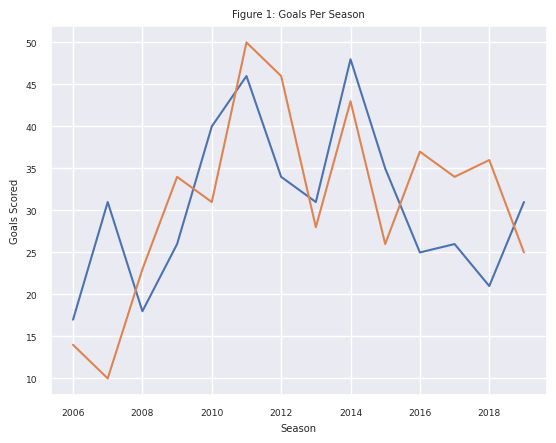

In [63]:
import matplotlib.pyplot as plt
df_c=df_concated[(df_concated['Player']=="Cristiano Ronaldo") ]
df_m=df_concated[ (df_concated['Player']=="Lionel Messi")]
plt.plot(df_c['Season'], df_c['Gls'],label="CR7")
plt.plot(df_m['Season'], df_m['Gls'],label="LM10")
plt.xlabel('Season')
plt.ylabel('Goals Scored')
plt.title('Figure 1: Goals Per Season')

In [64]:
df_concated['ID_Season']=df_concated['Player']+df_concated['Nation']+df_concated['Born'].astype(str)+df_concated['Season'].astype(str)

In [65]:
df_concated['ID']=df_concated['Player']+df_concated['Nation']+df_concated['Born'].astype(str)

In [66]:
df_concated.dropna(subset=['Season'],inplace=True)

In [67]:
df_concated['Season'].unique()

array([2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
       2014., 2015., 2016., 2017., 2018., 2019.])

In [68]:
df_concated['Season']=df_concated['Season'].astype(int)

In [69]:
df_concated['ID_Season']=df_concated['Player']+df_concated['Nation']+df_concated['Born'].astype(str)+df_concated['Season'].astype(str)

In [70]:
df_concated['Goals_pred']=df_concated['Gls']

In [71]:
df_concated['Ast_pred']=df_concated['Ast']

In [72]:
for season in range(2005,2020):
  print(season)

2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [73]:
df_concated

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,Ast90,G+A90,G-PK90,G+A-PK90,Season,ctd,ID_Season,ID,Goals_pred,Ast_pred
0,Dani Abalo,es ESP,18.0,1987.0,1,0,13,0.1,0,NaN,...,NaN,NaN,0.00,NaN,2005,1,Dani Abaloes ESP1987.02005,Dani Abaloes ESP1987.0,0,NaN
1,Jacques Abardonado,fr FRA,28.0,1978.0,30,28,2492,27.7,0,0.0,...,0.00,0.00,0.00,0.00,2006,1,Jacques Abardonadofr FRA1978.02006,Jacques Abardonadofr FRA1978.0,0,0.0
2,Christian Abbiati,it ITA,29.0,1977.0,36,36,3235,35.9,0,0.0,...,0.00,0.00,0.00,0.00,2006,1,Christian Abbiatiit ITA1977.02006,Christian Abbiatiit ITA1977.0,0,0.0
3,Pato Abbondanzieri,ar ARG,33.0,1972.0,36,36,3215,35.7,0,0.0,...,0.00,0.00,0.00,0.00,2005,1,Pato Abbondanzieriar ARG1972.02005,Pato Abbondanzieriar ARG1972.0,0,0.0
4,Elvis Abbruscato,it ITA,25.0,1981.0,29,15,1432,15.9,3,0.0,...,0.00,0.19,0.19,0.19,2006,1,Elvis Abbruscatoit ITA1981.02006,Elvis Abbruscatoit ITA1981.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,za RSA,26.0,1992.0,21,10,992,11.0,0,0.0,...,0.00,0.00,0.00,0.00,2018,1,Bongani Zunguza RSA1992.02018,Bongani Zunguza RSA1992.0,0,0.0
2728,Szymon Żurkowski,pl POL,21.0,1997.0,2,0,12,0.1,0,0.0,...,0.00,0.00,0.00,0.00,2018,1,Szymon Żurkowskipl POL1997.02018,Szymon Żurkowskipl POL1997.0,0,0.0
2729,David Zurutuza,es ESP,33.0,1986.0,5,2,157,1.7,0,0.0,...,0.00,0.00,0.00,0.00,2019,1,David Zurutuzaes ESP1986.02019,David Zurutuzaes ESP1986.0,0,0.0
2730,Martin Ødegaard,no NOR,20.0,1998.0,31,29,2527,28.1,4,6.0,...,0.21,0.36,0.14,0.36,2018,1,Martin Ødegaardno NOR1998.02018,Martin Ødegaardno NOR1998.0,4,6.0


In [74]:
for season in range(2005, 2020):
    for ID in df_concated.ID.unique():
        curr_rows = df_concated['ID_Season'] == str(ID) + str(season)
        next_rows = df_concated['ID_Season'] == str(ID) + str(season + 1)
        if curr_rows.any() and next_rows.any():
            values_to_assign = df_concated.loc[next_rows, 'Gls'].values
            if len(values_to_assign) == len(df_concated.loc[curr_rows, 'Goals_pred']):
                df_concated.loc[curr_rows, 'Goals_pred'] = values_to_assign

In [75]:
df_concated.columns

Index(['Player', 'Nation', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls90', 'Ast90',
       'G+A90', 'G-PK90', 'G+A-PK90', 'Season', 'ctd', 'ID_Season', 'ID',
       'Goals_pred', 'Ast_pred'],
      dtype='object')

In [76]:
df_concated=df_concated[df_concated['Goals_pred']>0]

In [77]:
df_concated

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,Ast90,G+A90,G-PK90,G+A-PK90,Season,ctd,ID_Season,ID,Goals_pred,Ast_pred
4,Elvis Abbruscato,it ITA,25.0,1981.0,29,15,1432,15.9,3,0.0,...,0.00,0.19,0.19,0.19,2006,1,Elvis Abbruscatoit ITA1981.02006,Elvis Abbruscatoit ITA1981.0,3,0.0
10,Fabrice Abriel,fr FRA,27.0,1979.0,38,38,3420,38.0,1,1.0,...,0.03,0.05,0.03,0.05,2006,1,Fabrice Abrielfr FRA1979.02006,Fabrice Abrielfr FRA1979.0,2,1.0
11,Pietro Accardi,it ITA,23.0,1982.0,27,25,2320,25.8,0,0.0,...,0.00,0.00,0.00,0.00,2005,1,Pietro Accardiit ITA1982.02005,Pietro Accardiit ITA1982.0,1,0.0
14,Emmanuel Adebayor,tg TOG,22.0,1984.0,29,21,1985,22.1,8,3.0,...,0.14,0.50,0.32,0.45,2006,1,Emmanuel Adebayortg TOG1984.02006,Emmanuel Adebayortg TOG1984.0,24,3.0
16,Adriano,br BRA,24.0,1982.0,25,19,1662,18.5,1,4.0,...,0.22,0.27,0.05,0.27,2006,1,Adrianobr BRA1982.02006,Adrianobr BRA1982.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,Kévin Zohi,ml MLI,22.0,1996.0,17,5,530,5.9,1,1.0,...,0.17,0.34,0.17,0.34,2018,1,Kévin Zohiml MLI1996.02018,Kévin Zohiml MLI1996.0,1,1.0
2721,Ben Zolinski,de GER,27.0,1992.0,28,14,1210,13.4,3,2.0,...,0.15,0.37,0.22,0.37,2019,1,Ben Zolinskide GER1992.02019,Ben Zolinskide GER1992.0,3,2.0
2724,Steven Zuber,ch SUI,27.0,1991.0,14,10,749,8.3,2,0.0,...,0.00,0.24,0.24,0.24,2018,1,Steven Zuberch SUI1991.02018,Steven Zuberch SUI1991.0,2,0.0
2730,Martin Ødegaard,no NOR,20.0,1998.0,31,29,2527,28.1,4,6.0,...,0.21,0.36,0.14,0.36,2018,1,Martin Ødegaardno NOR1998.02018,Martin Ødegaardno NOR1998.0,4,6.0


In [78]:
df_concated=df_concated.dropna(axis=0)

In [79]:
df_concated

,Player,Nation,Age,Born,MP,Starts,Min,90s,Gls,Ast,...,Ast90,G+A90,G-PK90,G+A-PK90,Season,ctd,ID_Season,ID,Goals_pred,Ast_pred
4,Elvis Abbruscato,it ITA,25.0,1981.0,29,15,1432,15.9,3,0.0,...,0.00,0.19,0.19,0.19,2006,1,Elvis Abbruscatoit ITA1981.02006,Elvis Abbruscatoit ITA1981.0,3,0.0
10,Fabrice Abriel,fr FRA,27.0,1979.0,38,38,3420,38.0,1,1.0,...,0.03,0.05,0.03,0.05,2006,1,Fabrice Abrielfr FRA1979.02006,Fabrice Abrielfr FRA1979.0,2,1.0
11,Pietro Accardi,it ITA,23.0,1982.0,27,25,2320,25.8,0,0.0,...,0.00,0.00,0.00,0.00,2005,1,Pietro Accardiit ITA1982.02005,Pietro Accardiit ITA1982.0,1,0.0
14,Emmanuel Adebayor,tg TOG,22.0,1984.0,29,21,1985,22.1,8,3.0,...,0.14,0.50,0.32,0.45,2006,1,Emmanuel Adebayortg TOG1984.02006,Emmanuel Adebayortg TOG1984.0,24,3.0
16,Adriano,br BRA,24.0,1982.0,25,19,1662,18.5,1,4.0,...,0.22,0.27,0.05,0.27,2006,1,Adrianobr BRA1982.02006,Adrianobr BRA1982.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,Kévin Zohi,ml MLI,22.0,1996.0,17,5,530,5.9,1,1.0,...,0.17,0.34,0.17,0.34,2018,1,Kévin Zohiml MLI1996.02018,Kévin Zohiml MLI1996.0,1,1.0
2721,Ben Zolinski,de GER,27.0,1992.0,28,14,1210,13.4,3,2.0,...,0.15,0.37,0.22,0.37,2019,1,Ben Zolinskide GER1992.02019,Ben Zolinskide GER1992.0,3,2.0
2724,Steven Zuber,ch SUI,27.0,1991.0,14,10,749,8.3,2,0.0,...,0.00,0.24,0.24,0.24,2018,1,Steven Zuberch SUI1991.02018,Steven Zuberch SUI1991.0,2,0.0
2730,Martin Ødegaard,no NOR,20.0,1998.0,31,29,2527,28.1,4,6.0,...,0.21,0.36,0.14,0.36,2018,1,Martin Ødegaardno NOR1998.02018,Martin Ødegaardno NOR1998.0,4,6.0


In [105]:
columns_features=["Age","Min","Gls","Ast","PK","CrdY","CrdR","Gls90","Ast90"]
X=df_concated[columns_features]
y=df_concated['Goals_pred']

In [106]:
from sklearn.preprocessing import StandardScaler
# Model Training
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
# Model Evaluation
import pprint
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 7.682342052505415
R-squared score: 0.5387786491686813


In [109]:
n_splits = 10
from sklearn.model_selection import TimeSeriesSplit
# Define the TimeSeriesSplit object and split the data into training and testing sets
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = reg.predict(X_test)

    # Calculate the mean squared error for the predictions
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error: {mse:.2f}')
    print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 8.33
R-squared score: 0.47213102892323966
Mean squared error: 7.92
R-squared score: 0.5077439596695745
Mean squared error: 8.70
R-squared score: 0.5224118407877201
Mean squared error: 7.30
R-squared score: 0.5562947466117993
Mean squared error: 8.70
R-squared score: 0.4901357025334949
Mean squared error: 8.81
R-squared score: 0.5259432406794569
Mean squared error: 8.99
R-squared score: 0.5087826313772186
Mean squared error: 7.40
R-squared score: 0.5660264982724246
Mean squared error: 8.01
R-squared score: 0.5174874096307606
Mean squared error: 2.80
R-squared score: 0.832300263523854


In [110]:
from sklearn.svm import SVR
reg = SVR(kernel='poly', degree=6)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 10.10640511911613
R-squared score: 0.3938772637741307


In [111]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=4,random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 2.7304862625600013
R-squared score: 0.8362414938661438


In [112]:
from sklearn.neural_network import MLPRegressor
reg=MLPRegressor(hidden_layer_sizes=(9),random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 2.6318711047248486
R-squared score: 0.8421558510085592


In [113]:
from sklearn.neural_network import MLPRegressor
reg=MLPRegressor(hidden_layer_sizes=(9,5),random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 2.599261174765141
R-squared score: 0.8441116028057958


In [114]:
from sklearn.neural_network import MLPRegressor
reg=MLPRegressor(hidden_layer_sizes=(9,5,5),random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 3.3692050078577838
R-squared score: 0.7979349002736928


In [115]:
from sklearn.neural_network import MLPRegressor
reg=MLPRegressor(hidden_layer_sizes=(9,5,5,5))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R-squared score:', r2_score(y_test, y_pred))

Mean squared error: 2.4534765306268262
R-squared score: 0.8528549083000205


In [116]:
df=pd.DataFrame(data=[[21,2690,17,10,0,6,0,0.57,0.33],[36,2456,18,3,3,8,0,0.66,0.11]],columns=["Age","Min","Gls","Ast","PK","CrdY","CrdR","Gls90","Ast90"])
reg.predict(df)

array([14.07492561, 13.58797896])